In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # to show fig

In [24]:
infected= pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/time_series_covid19_confirmed_global.csv')
deaths= pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/time_series_covid19_deaths_global.csv')
recovered= pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/time_series_covid19_recovered_global.csv')
countries=pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/UID_ISO_FIPS_LookUp_Table.csv')

In [25]:
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [26]:

infected['Province/State'].value_counts()

Province/State
Australian Capital Territory    1
Qinghai                         1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Guizhou                         1
Guangxi                         1
Guangdong                       1
Gansu                           1
Saint Pierre and Miquelon       1
Name: count, Length: 81, dtype: int64

In [27]:
infected.loc[infected['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,594,594,594,594,594,595,601,637,673,700
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,580,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,359,359,359,359,360,361,361,361,362,362
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,170,170,170,170,170,170,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,328,328,328,328,328,328,328,328,331,335


In [28]:
df_infected= infected.groupby('Country/Region').sum() #eyaletlere göre satırları topluyor

In [29]:
df_infected.head(20)
df_infected.info

<bound method DataFrame.info of                    Province/State        Lat       Long  1/22/20  1/23/20  \
Country/Region                                                              
Afghanistan                     0  33.000000  65.000000        0        0   
Albania                         0  41.153300  20.168300        0        0   
Algeria                         0  28.033900   1.659600        0        0   
Andorra                         0  42.506300   1.521800        0        0   
Angola                          0 -11.202700  17.873900        0        0   
...                           ...        ...        ...      ...      ...   
West Bank and Gaza              0  31.952200  35.233200        0        0   
Western Sahara                  0  24.215500 -12.885800        0        0   
Yemen                           0  15.552727  48.516388        0        0   
Zambia                          0 -15.416700  28.283300        0        0   
Zimbabwe                        0 -20.000000

In [30]:
df_infected[df_infected['Province/State'] != 0]

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,Australian Capital TerritoryNew South WalesNor...,-255.9695,1129.8623,0,0,0,0,4,5,5,...,7259,7265,7267,7274,7285,7289,7294,7320,7335,7347
Canada,AlbertaBritish ColumbiaGrand PrincessManitobaN...,671.7607,-1237.6289,0,0,0,0,1,1,2,...,96475,97178,97779,98241,98720,99159,99595,100043,100404,100763
China,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,84186,84191,84195,84198,84209,84216,84228,84286,84335,84378
Denmark,Faroe IslandsGreenland,189.8634,-40.0143,0,0,0,0,0,0,0,...,12124,12148,12162,12201,12216,12235,12299,12339,12393,12417
France,French GuianaFrench PolynesiaGuadeloupeMayotte...,91.3624,59.7192,0,0,2,3,3,3,4,...,190759,191102,191313,191523,192068,192493,193220,193746,194153,194305
Netherlands,"ArubaCuracaoSint MaartenBonaire, Sint Eustatiu...",107.0417,-265.0278,0,0,0,0,0,0,0,...,47541,47780,47945,48109,48294,48458,48668,48847,48990,49155
United Kingdom,BermudaCayman IslandsChannel IslandsGibraltarI...,270.0299,-482.9247,0,0,0,0,0,0,0,...,286294,287621,288834,290581,291588,292860,294402,295828,297342,298315


In [31]:
df_recovered = recovered.groupby('Country/Region').sum()
df_deaths = deaths.groupby('Country/Region').sum()

In [32]:
df_infected.loc['China'].to_frame() #çin sutunu

,China
Province/State,AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Lat,1083.3367
Long,3684.4197
1/22/20,548
1/23/20,643
...,...
6/11/20,84216
6/12/20,84228
6/13/20,84286
6/14/20,84335


In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

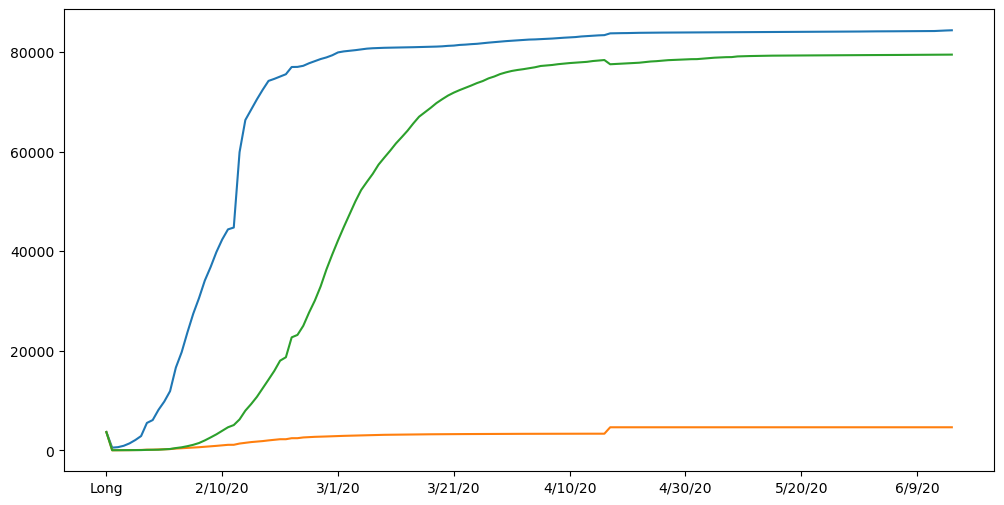

In [34]:
df_infected.loc['China'][2:].plot() 
df_deaths.loc['China'][2:].plot()
df_recovered.loc['China'][2:].plot()
plt.show()

In [35]:
df_infected.loc['China'][1:]

Lat        1083.3367
Long       3684.4197
1/22/20          548
1/23/20          643
1/24/20          920
             ...    
6/11/20        84216
6/12/20        84228
6/13/20        84286
6/14/20        84335
6/15/20        84378
Name: China, Length: 148, dtype: object

In [36]:
df_infected.drop(columns=['Lat', 'Long', 'Province/State'], inplace=False)
df_recovered = df_recovered.drop(columns=['Lat', 'Long', 'Province/State'])
df_deaths = df_deaths.drop(columns=['Lat', 'Long', 'Province/State'])

In [37]:
def make_frame(country:str):
    """Take country name as parameter, return infected, recovered, deaths values as timeseries table.
    pd.DataFrame()
    """
    pass

In [38]:
def make_frame(country:str):
    """Take country name as parameter, return infected, recovered, deaths values as timeseries table.
    
    """

    df = pd.DataFrame({
        'infected' : df_infected.loc[country],
        'recovered': df_recovered.loc[country],
        'deaths': df_deaths.loc[country]
    })
    df.index = pd.to_datetime(df.index, format='%m/%d/%y')
    return df

In [39]:
"""df_us = make_frame('US')
df_turkey = make_frame('Turkey")""" 
# lATIN 146INCI KONUMUNDA HATA VERİYOR.

'df_us = make_frame(\'US\')\ndf_turkey = make_frame(\'Turkey")'

In [40]:
#df_us['new_infected'] = df_us['infected'].diff() DİFF ARADAKİ FARKI VERİYOR.

In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd

In [42]:
birds=pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/birds.csv')
birds_df=pd.DataFrame(birds)
birds_df.head(10)

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0
5,Brant,Branta bernicla,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,55.0,66.0,880.0,2200.0,206.0,121.0
6,Cackling goose,Branta hutchinsii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,63.0,65.0,1398.0,2380.0,108.0,111.0
7,Canada goose,Branta canadensis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,75.0,110.0,2600.0,6500.0,127.0,185.0
8,Mute swan,Cygnus olor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Cygnus,LC,125.0,170.0,9200.0,14300.0,200.0,240.0
9,Trumpeter swan,Cygnus buccinator,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Cygnus,LC,138.0,180.0,7000.0,13600.0,185.0,250.0


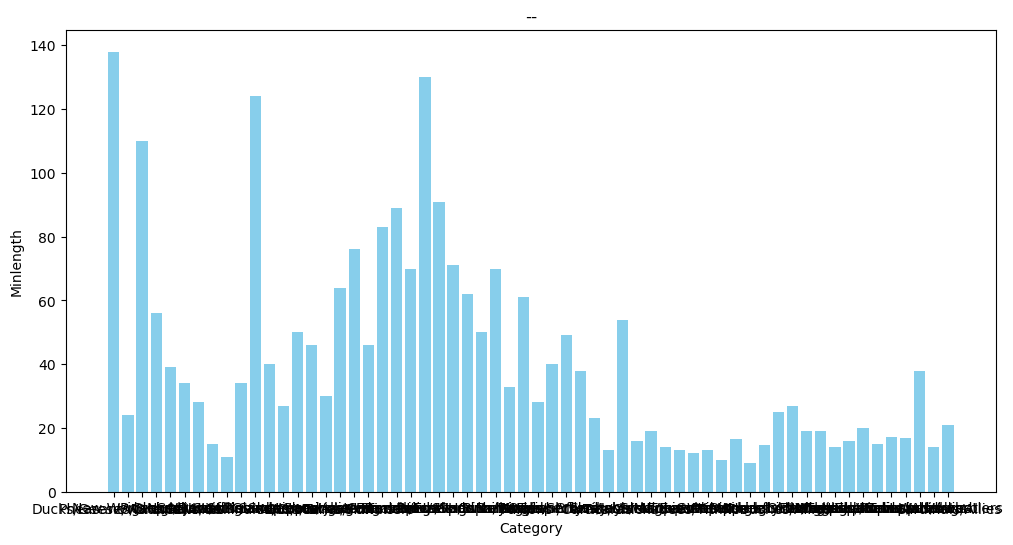

In [43]:
plt.bar(birds_df['Category'], birds_df['MinLength'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Minlength')
plt.title('--')
plt.show()

In [85]:
df_birds=pd.DataFrame(birds.groupby("Category")["MinLength"].sum())
df_birds.head(10)


,MinLength
Category,
Auks/Murres/Puffins,94.0
Barn-owls,33.0
Cardinals/Allies,170.5
Cormorants/Shags,134.0
Cranes,204.0
Crows/Jays/Magpies,213.0
Cuckoos,88.0
Dippers,16.5
Ducks/Geese/Waterfowl,2331.8


<Axes: xlabel='MinLength', ylabel='Count'>

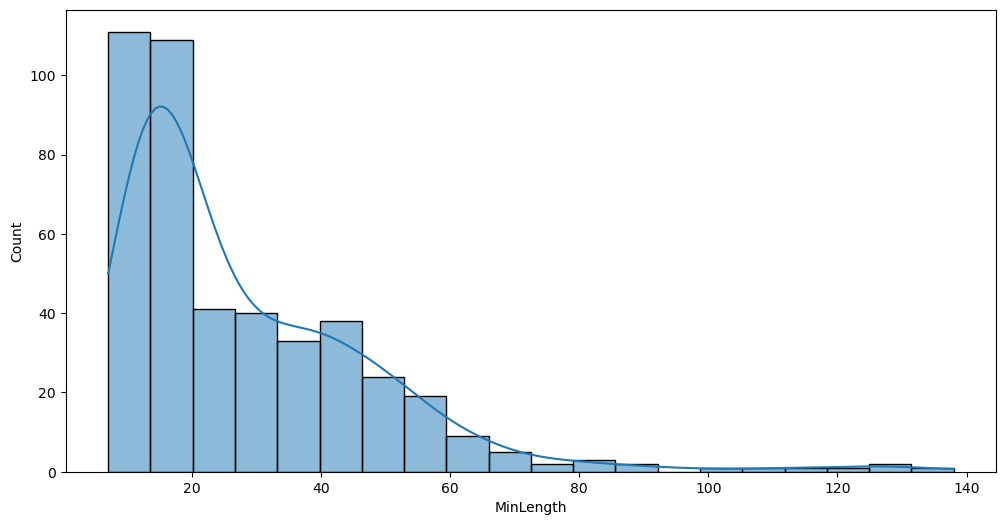

In [ ]:
birds_df.head(10)
sns.histplot(data=birds_df, x='MinLength', kde=True)

In [94]:
birds.Category.value_counts()

Category
Ducks/Geese/Waterfowl              45
New World warblers                 41
Sandpipers/Allies                  34
Gulls/Terns/Skimmers               28
New World sparrows                 26
Tyrant flycatchers                 19
Hawks/Eagles                       15
Troupials/Allies                   14
Finches/Euphonias/Allies           13
Woodpeckers                        12
Thrushes/Allies                    11
Owls                               11
Herons/Egrets/Bitterns             11
Cardinals/Allies                   11
Pheasants/Grouse/Allies             9
Pigeons/Doves                       8
Rails/Gallinules/Coots              8
Hummingbirds                        7
Plovers/Lapwings                    7
Wrens                               7
Swallows                            7
Vireos/Shrike-babblers/Erpornis     7
Grebes                              6
Crows/Jays/Magpies                  6
Falcons /Caracaras                  6
Longspurs/Snow buntings             5
Moc

In [100]:
Category_counts=birds["Category"].value_counts()
df = pd.DataFrame({'Category': Category_counts.index, 'SpeciesCount': Category_counts.values})
df

,Category,SpeciesCount
0,Ducks/Geese/Waterfowl,45
1,New World warblers,41
2,Sandpipers/Allies,34
3,Gulls/Terns/Skimmers,28
4,New World sparrows,26
5,Tyrant flycatchers,19
6,Hawks/Eagles,15
7,Troupials/Allies,14
8,Finches/Euphonias/Allies,13
9,Woodpeckers,12


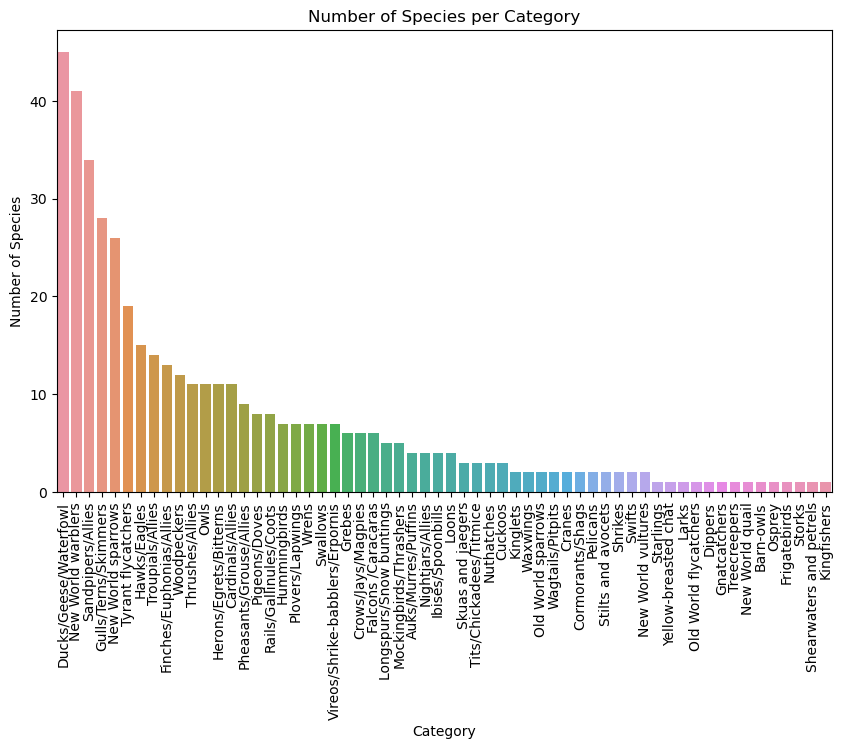

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='SpeciesCount', data=df)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Number of Species per Category')
plt.show()

<BarContainer object of 10 artists>

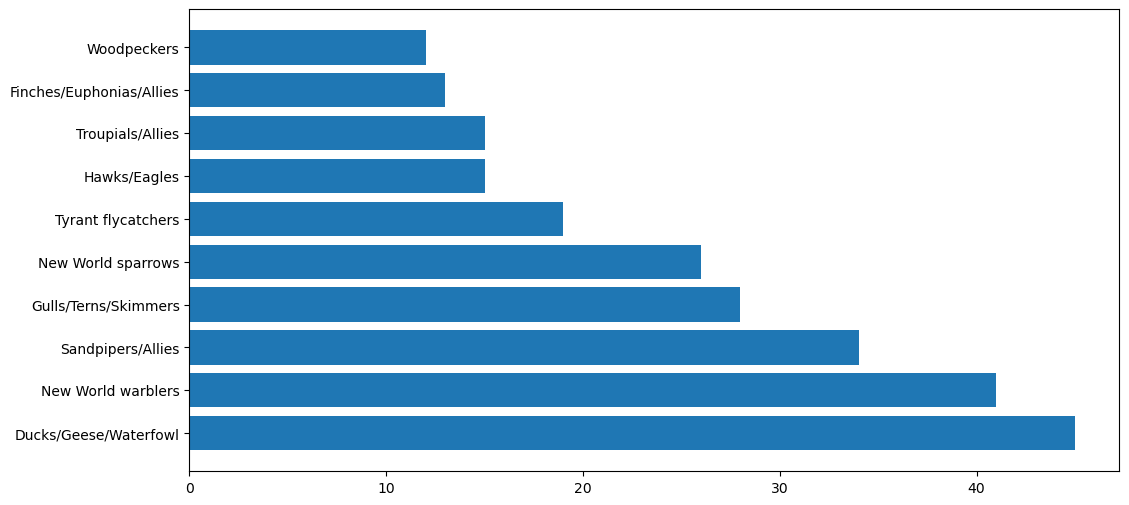

In [104]:
#barh horizontal bar y width(x ekseni)
plt.barh(y = birds["Category"].value_counts().sort_values(ascending=False).iloc[0:10].index, 
         width =birds["Family"].value_counts().sort_values(ascending=False).iloc[0:10].values)

In [105]:
cat_cols=[
    'Category',
    'Order',
    'Family',
    'Genus',
    'ConservationStatus'
]
for i in cat_cols:
    a=birds[i].nunique()
    print(f"{i}: {a}")

Category: 60
Order: 21
Family: 59
Genus: 238
ConservationStatus: 6


In [107]:
grouped_counts = birds.groupby("Order")["ConservationStatus"].count().sort_values(ascending=False)
grouped_counts

Order
Passeriformes        195
Charadriiformes       78
Anseriformes          45
Pelecaniformes        17
Accipitriformes       16
Strigiformes          12
Piciformes            12
Gruiformes            10
Galliformes           10
Apodiformes            9
Columbiformes          8
Podicipediformes       6
Falconformes           6
Gaviiformes            4
Caprimulgiformes       4
Cuculiformes           3
Suliformes             3
Cathartiformes         2
Coraciiformes          1
Ciconiiformes          1
Procellariiformes      1
Name: ConservationStatus, dtype: int64

c:\Users\yldrm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


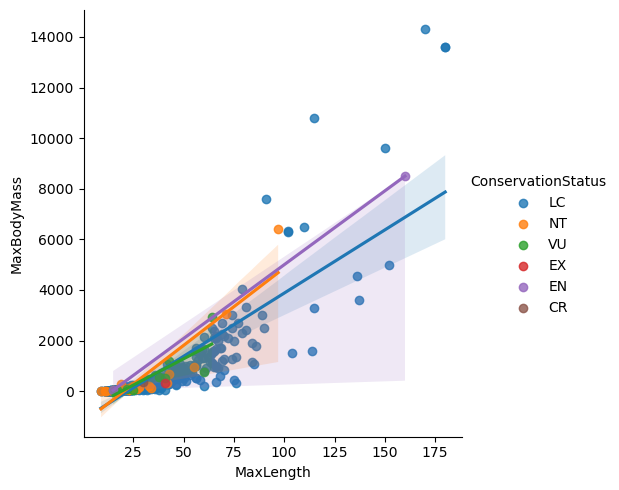

In [108]:
sns.lmplot(
    x='MaxLength',
    y='MaxBodyMass',
    data=birds,
    hue='ConservationStatus'
)

In [118]:
dfr=pd.DataFrame(birds.groupby(['Family' , 'Name'])['MaxLength'].max())
dfr.sort_values(by="MaxLength")

MaxLength
Family      Name                                
Trochilidae Costa's hummingbird              8.9
            Rufous hummingbird               9.0
            Ruby-throated hummingbird        9.0
            Calliope hummingbird            10.0
            Anna's hummingbird              10.9
...                                          ...
Pelecanidae Brown pelican                  152.0
Gruidae     Whooping crane                 160.0
Anatidae    Mute swan                      170.0
Pelecanidae American white pelican         180.0
Anatidae    Trumpeter swan                 180.0

[443 rows x 1 columns]

In [124]:
dfx=birds.groupby(['Family' , 'Name'])['MaxLength'].max()
dfx.sort_values(ascending=False)

Family       Name                     
Anatidae     Trumpeter swan               180.0
Pelecanidae  American white pelican       180.0
Anatidae     Mute swan                    170.0
Gruidae      Whooping crane               160.0
Pelecanidae  Brown pelican                152.0
                                          ...  
Trochilidae  Anna's hummingbird            10.9
             Calliope hummingbird          10.0
             Rufous hummingbird             9.0
             Ruby-throated hummingbird      9.0
             Costa's hummingbird            8.9
Name: MaxLength, Length: 443, dtype: float64

In [63]:
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)
speeds
grouped =pd.DataFrame(speeds.groupby("class")["max_speed"].mean())
grouped

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [74]:
dfx = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
dfx

,A,B,C,D
0,foo,one,-0.014323,-0.288086
1,bar,one,0.574836,0.641859
2,foo,two,0.102171,-0.741075
3,bar,three,-0.988160,1.130709
4,foo,two,1.577729,0.604819
5,bar,two,-1.460120,0.422555
6,foo,one,0.897200,0.000703
7,foo,three,0.457336,-0.903082


In [77]:
groupedc= pd.DataFrame(dfx.groupby(["A"]))
groupedc

,0,1
0,"(bar,)",A B C D 1 bar on...
1,"(foo,)",A B C D 0 foo on...
